In [232]:
from keras.models import Sequential
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

In [200]:
excel_file = 'default_of_credit_card_clients.xls'
input_data = pd.read_excel(excel_file, header=1, skiprows=0)

In [201]:
input_data.shape

(30000, 25)

Droping ID column as 

In [202]:
input_data.drop(['ID'], axis=1, inplace=True)

In [203]:
input_data=input_data.rename(columns={"PAY_0": "PAY_1", "default payment next month": "DEFAULT"})

Check if there is any mnissing values in the dataframe

In [204]:
input_data.isnull().values.any()

False

Checking corelation of DEFAULT with other numerical varriables

In [205]:
input_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [206]:
import matplotlib.pyplot as plt
def plot_corr(df,size=30):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

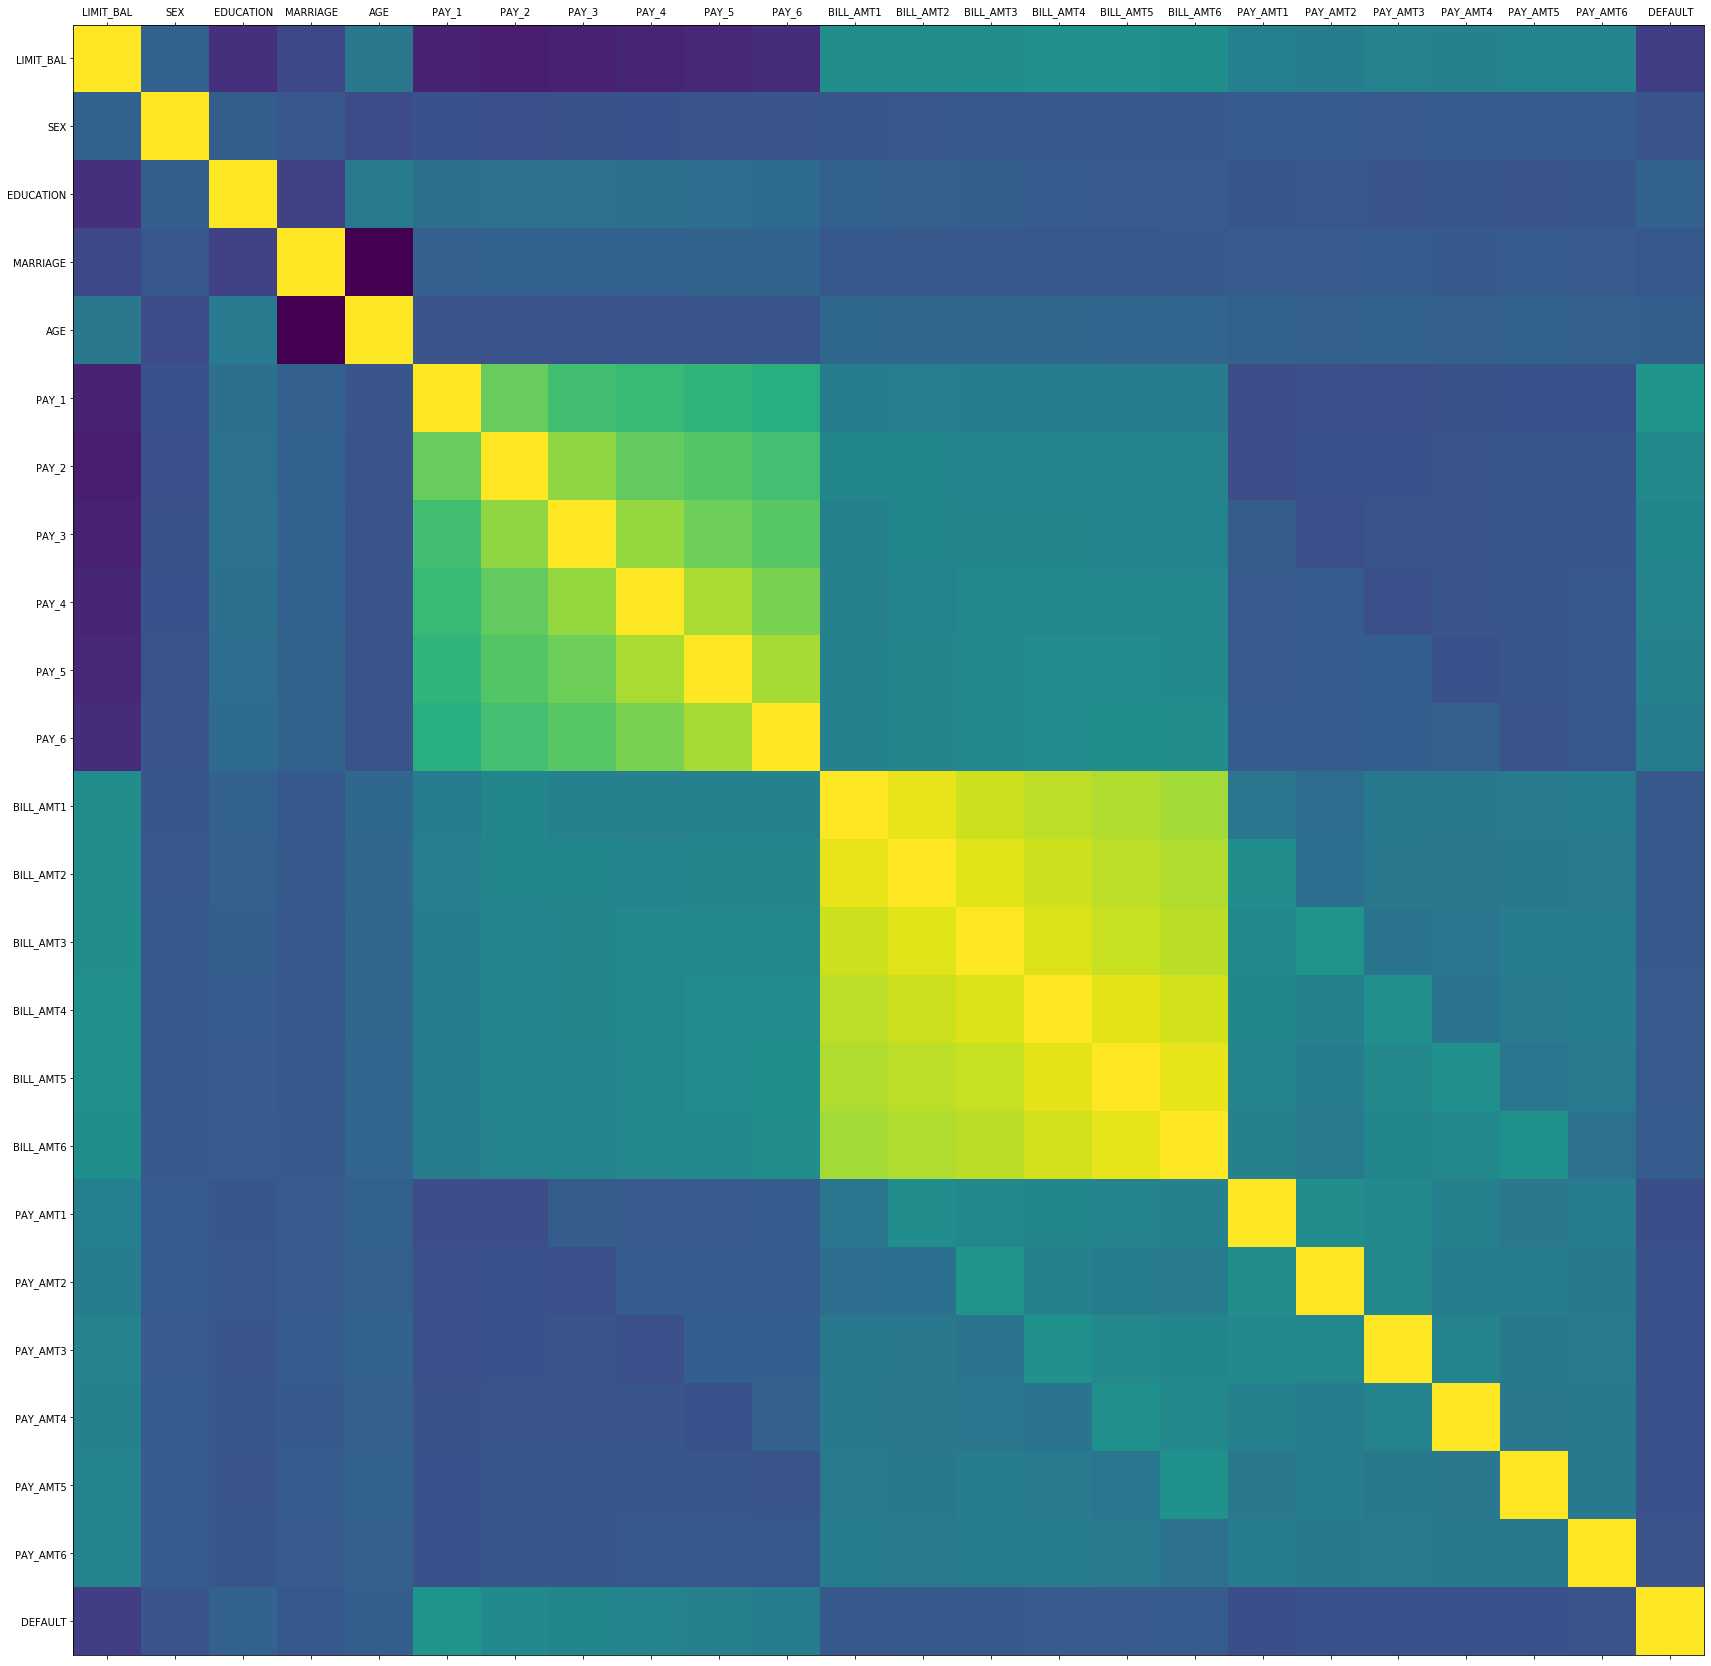

In [207]:
plot_corr(input_data)

In [208]:
input_data[input_data.columns[1:]].corr()['DEFAULT'][:]

SEX         -0.039961
EDUCATION    0.028006
MARRIAGE    -0.024339
AGE          0.013890
PAY_1        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
DEFAULT      1.000000
Name: DEFAULT, dtype: float64

PAY_1 to PAY_6 are highly correlated with our dependent variable ‘DEFAULT’

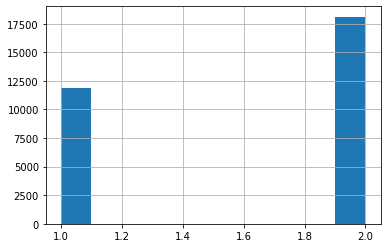

In [209]:
input_data['SEX'].hist()

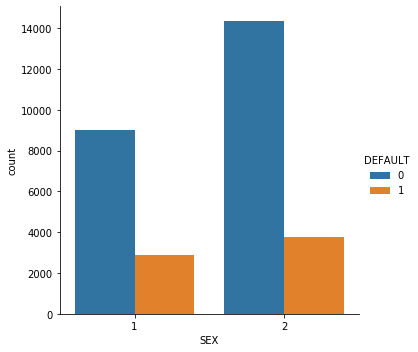

In [210]:
sns.catplot(x="SEX",kind="count",hue="DEFAULT",data=input_data)

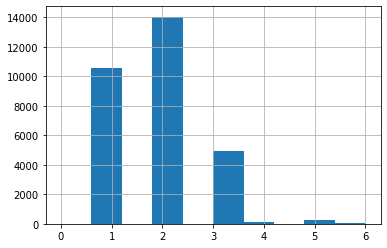

In [211]:
input_data['EDUCATION'].hist()

Mergeing 0, 5 and 6 to 4 that is (others)

In [212]:
input_data['EDUCATION']=input_data['EDUCATION'].apply(lambda x: 4 if(x == 0 or x == 5 or x == 6)  else x) 

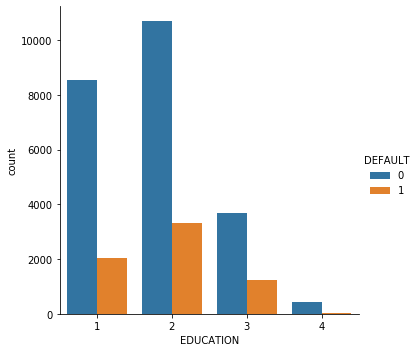

In [213]:
sns.catplot(x="EDUCATION",kind="count",hue="DEFAULT",data=input_data)

In [214]:
input_data['MARRIAGE'].unique()

array([1, 2, 3, 0])

Here we found that there are 4 unique value of MARRIAGE
1 for Married
2 for Unmarried
3 for Others
0 for Divorce (Maybe)
So we merge 0 t0 3 (i.e. others)

In [215]:
input_data['MARRIAGE']=input_data['MARRIAGE'].apply(lambda x: 3 if x == 0  else x) 

In [216]:
input_data['MARRIAGE'].unique()

array([1, 2, 3])

In [217]:
input_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [218]:
def create_baseline():
    # Create Model
    model = Sequential()
    model.add(Dense(22, input_dim=22, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile Model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [219]:
X = input_data.values[:, 0:22]
Y = input_data.values[:, 23]

Evaluate Model

In [220]:
estimators = list()
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline)))

In [221]:
pipe = Pipeline(estimators)

In [222]:
k_fold = StratifiedKFold(n_splits=10, shuffle=True)

In [233]:
Y_pred = cross_val_predict(pipe, X, Y, cv=k_fold)

Epoch 1/1
27000/27000 [==============================] - 6s 217us/step - loss: 0.4974 - acc: 0.7928
Epoch 1/1
27000/27000 [==============================] - 6s 209us/step - loss: 0.4829 - acc: 0.8033
Epoch 1/1
27000/27000 [==============================] - 6s 219us/step - loss: 0.4955 - acc: 0.7927
Epoch 1/1
27000/27000 [==============================] - 6s 217us/step - loss: 0.4914 - acc: 0.7906
Epoch 1/1
27000/27000 [==============================] - 6s 227us/step - loss: 0.4939 - acc: 0.7984
Epoch 1/1
27000/27000 [==============================] - 7s 242us/step - loss: 0.5003 - acc: 0.7861
Epoch 1/1
27000/27000 [==============================] - 7s 254us/step - loss: 0.4915 - acc: 0.7990
Epoch 1/1
27000/27000 [==============================] - 6s 238us/step - loss: 0.5248 - acc: 0.7648
Epoch 1/1
27000/27000 [==============================] - 7s 251us/step - loss: 0.5115 - acc: 0.7742
Epoch 1/1
27000/27000 [==============================] - 7s 249us/step - loss: 0.4914 - acc: 0.7997


In [238]:
print("Baseline: %.2f%% (%.2f%%)" % (Y_pred.mean() * 100, Y_pred.std() * 100))

Baseline: 8.98% (28.59%)


In [239]:
conf_mat=confusion_matrix(Y, Y_pred)

In [240]:
conf_mat

array([[22480,   884],
       [ 4826,  1810]])